В следующих заданиях будет использоваться датасет boston из sklearn.datasets.

Оставьте последние 25% объектов для контроля качества, разделив X и y на X_train, y_train и X_test, y_test с помощью train_test_split(X, y, train_size = 0.75, shuffle=False).

Целью заданий будет реализовать простой вариант градиентного бустинга над регрессионными деревьями для случая квадратичной функции потерь.

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [41]:
boston = datasets.load_boston()
X, y = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, shuffle=False) #train_test_split(X, y, test_size=0.25, shuffle=True, random_state=1)

/home/dex/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

#### Задание 1

Как вы уже знаете из лекций, бустинг - это метод построения композиций базовых алгоритмов с помощью последовательного добавления к текущей композиции нового алгоритма с некоторым коэффициентом.

Градиентный бустинг обучает каждый новый алгоритм так, чтобы он приближал антиградиент ошибки по ответам композиции на обучающей выборке. Аналогично минимизации функций методом градиентного спуска, в градиентном бустинге мы подправляем композицию, изменяя алгоритм в направлении антиградиента ошибки.

Воспользуйтесь формулой из лекций, задающей ответы на обучающей выборке, на которые нужно обучать новый алгоритм (фактически это лишь чуть более подробно расписанный градиент от ошибки), и получите частный ее случай, если функция потерь L - квадрат отклонения ответа композиции a(x) от правильного ответа y на данном x.

Если вы давно не считали производную самостоятельно, вам поможет таблица производных элементарных функций (которую несложно найти в интернете) и правило дифференцирования сложной функции. После дифференцирования квадрата у вас возникнет множитель 2 — т.к. нам все равно предстоит выбирать коэффициент, с которым будет добавлен новый базовый алгоритм, проигноируйте этот множитель при дальнейшем построении алгоритма.

Запишите в качестве ответа формулу производной без константы 2.

Для ввода формулы НЕ используйте пробел, символ дифференцирования обозначьте одинарной кавычкой (он же штрих), а производная должна быть последним членом при умножении. 

(y-a(x))*a'(x)  is correct

#### Задание 2

Заведите массив для объектов __DecisionTreeRegressor__ (будем их использовать в качестве базовых алгоритмов) и для вещественных чисел (это будут коэффициенты перед базовыми алгоритмами).

В цикле обучите последовательно 50 решающих деревьев с параметрами max_depth=5 и random_state=42 (остальные параметры - по умолчанию). В бустинге зачастую используются сотни и тысячи деревьев, но мы ограничимся 50, чтобы алгоритм работал быстрее, и его было проще отлаживать (т.к. цель задания разобраться, как работает метод). Каждое дерево должно обучаться на одном и том же множестве объектов, но ответы, которые учится прогнозировать дерево, будут меняться в соответствие с полученным в задании 1 правилом.

Попробуйте для начала всегда брать коэффициент равным 0.9. Обычно оправдано выбирать коэффициент значительно меньшим - порядка 0.05 или 0.1, но т.к. в нашем учебном примере на стандартном датасете будет всего 50 деревьев, возьмем для начала шаг побольше.

В процессе реализации обучения вам потребуется функция, которая будет вычислять прогноз построенной на данный момент композиции деревьев на выборке X:

    def gbm_predict(X): return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X] (считаем, что base_algorithms_list - список с базовыми алгоритмами, coefficients_list - список с коэффициентами перед алгоритмами)

Эта же функция поможет вам получить прогноз на контрольной выборке и оценить качество работы вашего алгоритма с помощью __mean_squared_error__ в sklearn.metrics.

Возведите результат в степень 0.5, чтобы получить RMSE. Полученное значение RMSE введите в поле для ответа:

In [23]:
#функция, которая будет вычислять прогноз построенной на данный момент композиции деревьев на выборке X:
def gbm_predict(X): return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

В цикле используем x_train и y_train. В конце, где считаем корень, надо будет брать y_test и предсказание от x_test.

(a)- мы вычисляем новые y для обучения следующего дерева с помощью кода 
    y_pred = y_train - gbm_predict(X_train) 
что по идее эквивалентно (y-a(x)) из формулы в предыдущем задании. Но ведь у нас еще есть a'(x), что с ней? 

(b)- в задании 6.4.2 применяется лишь общий подход, а не частный случай, описанный в 6.4.1.

In [44]:
base_algorithms_list = [] # массив для объектов DecisionTreeRegressor (будем их использовать в качестве базовых алгоритмов)
coefficients_list = [] # массив для вещественных чисел (это будут коэффициенты перед базовыми алгоритмами)

alpha = 0.9
MAX_DEPTH = 5
RANDOM_SEED = 139
ITERATIONS = 50

for i in range(ITERATIONS):
    model = DecisionTreeRegressor(max_depth = MAX_DEPTH, random_state = RANDOM_SEED)
    y_pred = y_train - gbm_predict(X_train)

    model.fit(X_train, y_pred)
    
    base_algorithms_list.append(model)
    alpha = 0.9 # 0.9 / (1.0 + i)
    coefficients_list.append(alpha)
    
RMSE = mean_squared_error(y_true = y_test, y_pred = gbm_predict(X_test))**0.5
print(RMSE)

5.3174600019002005


5.317530 is correct

RMSE : Ошибка должна уменьшаться на обучающей выборке - на тестовой она может и расти (это переобучение).

(b)- на первой итерации базовый алгоритм должен учиться непосредственно на y_train, а далее уже на разнице между y_train и y_pred, т.е.:

In [47]:
base_algorithms_list = [] # массив для объектов DecisionTreeRegressor (будем их использовать в качестве базовых алгоритмов)
coefficients_list = [] # массив для вещественных чисел (это будут коэффициенты перед базовыми алгоритмами)

s = y_train.copy()
for i in range(ITERATIONS):
    model = DecisionTreeRegressor(max_depth = MAX_DEPTH, random_state = RANDOM_SEED)
    model.fit(X_train, s)
    base_algorithms_list.append(model)
    coefficients_list.append(alpha)
    
    y_pred = gbm_predict(X_train)
    s = (y_train - y_pred)
    
    coefficients_list.append(alpha)
    
RMSE = mean_squared_error(y_true = y_test, y_pred = gbm_predict(X_test))**0.5
print(RMSE)

5.3174600019002005


#### Задание 3

Вас может также беспокоить, что двигаясь с постоянным шагом, вблизи минимума ошибки ответы на обучающей выборке меняются слишком резко, перескакивая через минимум.

Попробуйте уменьшать вес перед каждым алгоритмом с каждой следующей итерацией по формуле 0.9 / (1.0 + i), где i - номер итерации (от 0 до 49). Используйте качество работы алгоритма как ответ в пункте 3.

В реальности часто применяется следующая стратегия выбора шага: как только выбран алгоритм, подберем коэффициент перед ним численным методом оптимизации таким образом, чтобы отклонение от правильных ответов было минимальным. Мы не будем предлагать вам реализовать это для выполнения задания, но рекомендуем попробовать разобраться с такой стратегией и реализовать ее при случае для себя.


In [48]:
base_algorithms_list = [] # массив для объектов DecisionTreeRegressor (будем их использовать в качестве базовых алгоритмов)
coefficients_list = [] # массив для вещественных чисел (это будут коэффициенты перед базовыми алгоритмами)

s = y_train.copy()
for i in range(ITERATIONS):
    model = DecisionTreeRegressor(max_depth = MAX_DEPTH, random_state = RANDOM_SEED)
    model.fit(X_train, s)
    base_algorithms_list.append(model)
    alpha = 0.9 / (1.0 + i)
    coefficients_list.append(alpha)
    
    y_pred = gbm_predict(X_train)
    s = (y_train - y_pred)
    
    coefficients_list.append(alpha)
    
RMSE = mean_squared_error(y_true = y_test, y_pred = gbm_predict(X_test))**0.5
print(RMSE)

4.88907239698691


4.757320 is correct 
problem can be with version of sklearn

In [50]:
alpha = 0.9
MAX_DEPTH = 5
RANDOM_SEED = 139
ITERATIONS = 50

for i in range(ITERATIONS):
    model = DecisionTreeRegressor(max_depth = MAX_DEPTH, random_state = RANDOM_SEED)
    y_pred = y_train - gbm_predict(X_train)

    model.fit(X_train, y_pred)
    
    base_algorithms_list.append(model)
    alpha = 0.9 / (1.0 + i)
    coefficients_list.append(alpha)
    
RMSE = mean_squared_error(y_true = y_test, y_pred = gbm_predict(X_test))**0.5
print(RMSE)

5.006973716253128


#### Задание 4

Реализованный вами метод - градиентный бустинг над деревьями - очень популярен в машинном обучении. Он представлен как в самой библиотеке sklearn, так и в сторонней библиотеке XGBoost, которая имеет свой питоновский интерфейс. На практике XGBoost работает заметно лучше GradientBoostingRegressor из sklearn, но для этого задания вы можете использовать любую реализацию.

Исследуйте, переобучается ли градиентный бустинг с ростом числа итераций (и подумайте, почему), а также с ростом глубины деревьев. На основе наблюдений выпишите через пробел номера правильных из приведенных ниже утверждений в порядке возрастания номера (это будет ответ в п.4):

Populating the interactive namespace from numpy and matplotlib
[8.814038583477592, 7.451904949335349, 6.752289155727839]
[8.235281334243622, 6.672159496002175, 5.815544345863425]
[8.60085780173012, 7.203194857681147, 6.404149203632535]
[8.795997841017323, 7.473867016039277, 6.752546915356274]
[8.83625650375847, 7.35123738763429, 6.537921247424763]
[8.625938939069684, 7.192324264520925, 6.477632569672192]


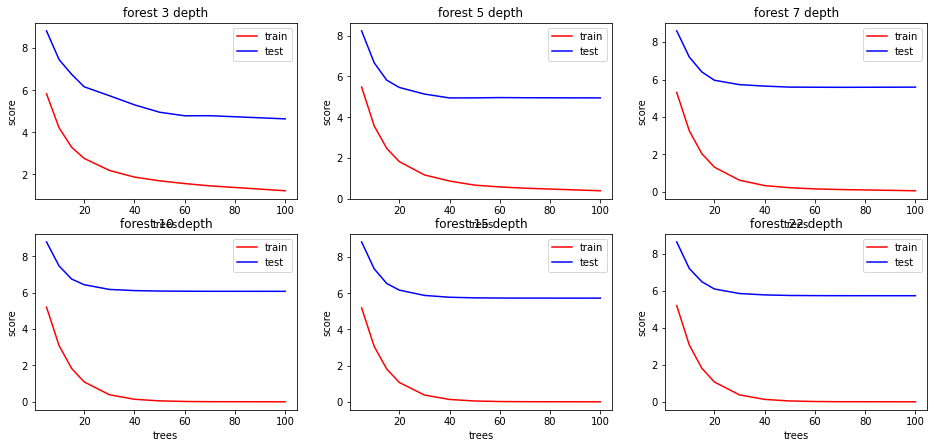

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
%pylab inline

trees = np.array([5, 10, 15, 20, 30, 40, 50, 60, 70, 100])
depths = np.array([3, 5, 7, 10, 15, 22])
pyplot.figure(figsize=(16, 11))
i = 1
for d in depths:
    scores_train, scores_test = list(), list()
    for num in trees:
        boost = GradientBoostingRegressor(n_estimators=num, max_depth=d, random_state=42).fit(X_train, y_train)
        scores_train.append(np.sqrt(mean_squared_error(y_train, boost.predict(X_train))))
        scores_test.append(np.sqrt(mean_squared_error(y_test, boost.predict(X_test))))
    print(scores_test[:3])
    ax = plt.subplot(3, 3, i)
    ax.set_title("forest {} depth".format(d))
    pyplot.plot(trees, scores_train, color="red", label="train")
    pyplot.plot(trees, scores_test, color="blue", label="test")
    pyplot.xlabel("trees")
    pyplot.ylabel("score")
    pyplot.legend()
    i += 1

#### Задание 5

Сравните получаемое с помощью градиентного бустинга качество с качеством работы линейной регрессии.

Для этого обучите LinearRegression из sklearn.linear_model (с параметрами по умолчанию) на обучающей выборке и оцените для прогнозов полученного алгоритма на тестовой выборке RMSE. Полученное качество - ответ в пункте 5.

В данном примере качество работы простой модели должно было оказаться хуже, но не стоит забывать, что так бывает не всегда. В заданиях к этому курсу вы еще встретите пример обратной ситуации.


In [55]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Посчитать значение ошибок MSE и RMSE для тренировочных данных
RMSE = mean_squared_error(y_test, y_pred)**0.5 #error
print(RMSE)

8.254979753549016


8.254979753549016 is correct